First, verify that the dynamics work.

In [6]:
%reload_ext autoreload
%autoreload 2
import numpy as np

# create a time array
dt = 0.001
num_time_steps = 4000
time_array = np.arange(0.0, dt*num_time_steps, dt)

# initial state
state_initial = np.asarray([10.0, 10.0, 0.0, 0.0, 0.0, 0.0])

from underactuated_satellite import underactuatedSatellite

satellite = underactuatedSatellite()
trajectory = satellite.simulate_states_over_time_passive(state_initial, time_array)

print trajectory

[[ 10.  10.   0.   0.   0.   0.]
 [ 10.  10.   0.   0.   0.   0.]
 [ 10.  10.   0.   0.   0.   0.]
 ..., 
 [ 10.  10.   0.   0.   0.   0.]
 [ 10.  10.   0.   0.   0.   0.]
 [ 10.  10.   0.   0.   0.   0.]]


Now, trajectory optimize using direct transcription!

In [27]:
# Invokes your trajectory optimization
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from underactuated_satellite import underactuatedSatellite
import time

satellite = underactuatedSatellite()

x0 = np.asarray([10.0, 10.0, 0.0, 0.0, 0.0, 0.0])
minimum_time = 60. 
maximum_time = 60.
exec_time = np.zeros(100)
for j in range(100):
    start = time.time()
    traj, u_traj, time_array = satellite.compute_trajectory(x0, minimum_time, maximum_time)
    end = time.time()
    exec_time[j] = end-start
avg_exec_time = np.mean(exec_time)
print avg_exec_time
#satellite.plot_trajectory(traj)

5.27796854019


0.200538291819


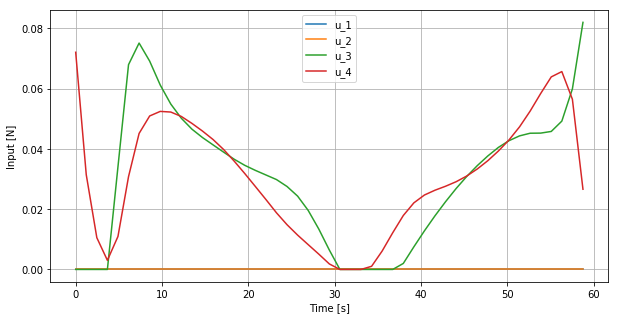

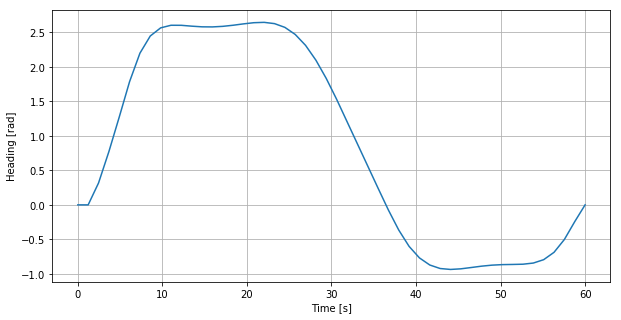

In [16]:
dt = time_array[1] - time_array[0]
cost = 0
for j in range(49):
    cost = cost + (dt*u_traj[j,0])**2 + (dt*u_traj[j,1])**2 + (dt*u_traj[j,2])**2 + (dt*u_traj[j,3])**2
print cost

import matplotlib.pyplot as plt

plt.figure().set_size_inches(10, 5)
plt.plot(time_array[0:-1], u_traj)
plt.legend(["u_1", "u_2", "u_3", "u_4"])
plt.xlabel("Time [s]")
plt.ylabel("Input [N]")
plt.grid(True)

plt.figure().set_size_inches(10, 5)
plt.plot(time_array[:], traj[:,4])
plt.xlabel("Time [s]")
plt.ylabel("Heading [rad]")
plt.grid(True)